## Part 1 Scratching data
- use api of coinmarketcap.com to fetch data of cryptos

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd6decf19-56fb-4957-8de3-df5ccafabb91',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  import pandas as pd
  df = pd.json_normalize(data, record_path='data')
  print(df)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

         id         name    symbol         slug  num_market_pairs  \
0         1      Bitcoin       BTC      bitcoin             10485   
1      1027     Ethereum       ETH     ethereum              7481   
2       825  Tether USDt      USDT       tether             63153   
3      1839          BNB       BNB          bnb              1658   
4        52          XRP       XRP          xrp              1106   
...     ...          ...       ...          ...               ...   
4995  24396     AEROTYME       IND     aerotyme                 5   
4996  22753    Dinerobet    DINERO    dinerobet                 1   
4997  24844  Quick Intel    QUICKI  quick-intel                 2   
4998  25368     100xgems  100XGEMS     100xgems                 3   
4999  20267  Pollen Coin       PCN  pollen-coin                 2   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4

There are nested json data in the coming data, normalize them with pd.json normalize

## Tansformation or cleaning
-  mainly nothing to clear. Remove time in date_added.

In [5]:
def reset_date(str):
    return str.split('T')[0]
df['date_added'] = df['date_added'].apply(reset_date)
print(df)
df.to_csv('data.csv')

         id          name        symbol          slug  num_market_pairs  \
907    7703     MileVerse           MVC     mileverse                 5   
3737  27087        Caacon            CC        caacon                 3   
4318  17566      AlphaDEX          ROAR      alphadex                 6   
3116  21032       Redluna       REDLUNA       redluna                 2   
4341  23420  King Finance          KING  king-finance                 2   
...     ...           ...           ...           ...               ...   
2808  25656       Risitas        RISITA       risitas                 2   
2976  28205  JOEBIDEN2024  JOEBIDEN2024  joebiden2024                 1   
4241  17769         Felix           FLX   felix-token                 2   
2108   8752       Landbox          LAND       landbox                 4   
2128   3266       Carebit          CARE       carebit                 2   

      date_added                   tags    max_supply  circulating_supply  \
907   2020-11-17      

Now some simple plots, for example, highest price

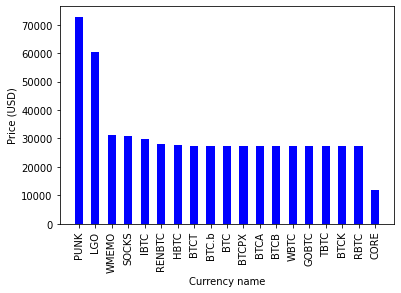

<Figure size 2880x288 with 0 Axes>

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv('data.csv')
df.sort_values(by = ['quote.USD.price'], ascending=False, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.price'].head(20),color = 'blue', width=0.5)
plt.xlabel('Currency name')
plt.ylabel('Price (USD)')
plt.xticks(rotation = 'vertical')
plt.figure().set_figwidth(40)
plt.show()

Surprisingly BTC is not the most expensive of all these currencies. It is clear though, that most of them are BTC related.

Or, say change in percant of price in 24H

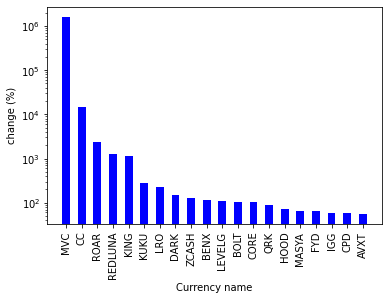

<Figure size 2880x288 with 0 Axes>

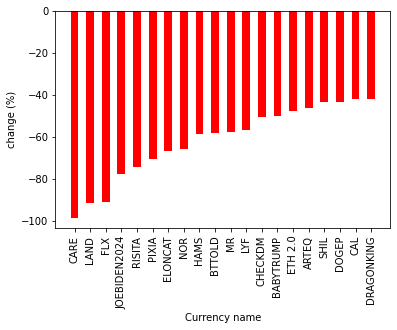

<Figure size 2880x288 with 0 Axes>

In [5]:
df.sort_values(by = ['quote.USD.percent_change_24h'], ascending=False, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.percent_change_24h'].head(20),color = 'blue', width=0.5)
plt.xlabel('Currency name')
plt.ylabel('change (%)')
plt.xticks(rotation = 'vertical')
plt.yscale('log')
plt.figure().set_figwidth(40)
plt.show()
df.sort_values(by = ['quote.USD.percent_change_24h'], ascending=True, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.percent_change_24h'].head(20),color = 'red', width=0.5)
plt.xlabel('Currency name')
plt.ylabel('change (%)')
plt.xticks(rotation = 'vertical')
plt.yscale('linear')
plt.figure().set_figwidth(40)
plt.show()

It really impresses me how some crytos' price can rise or drop in very short time lol. 1000 times higher price, huh. And it surprises me that actually everyday there would be some currency that price drop nearly 100%. IT shows me how unstable these things are and we definitely should not invest on them.


- a box plot of price

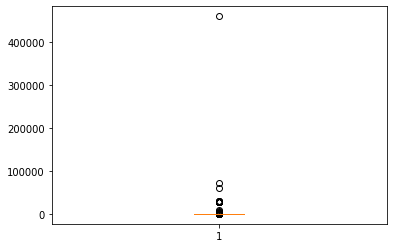

In [4]:
plt.boxplot(df['quote.USD.price'])
plt.show()

Seems that most cryptos have very low prices. Only a few of them have prices that are higher than 10k.